# Data Exploration

In [1]:
# Input Data
import pandas as pd
zone_columns = ['Gallery King Furniture','Ground BBQ Ranch','Ground Dish Kiosk','Ground Freedom','Level 1 Dare Gallery','Level 1 JB HiFi','Level 1 Nick Scali','Level 2 Harvey Norman','Lower Ground Baby Bunting','Lower Ground Escalators']
visitors = pd.read_table('data/shoppers.txt', na_values = '\\N',names = ['shopper_date','Gallery King Furniture','Ground BBQ Ranch','Ground Dish Kiosk','Ground Freedom','Level 1 Dare Gallery','Level 1 JB HiFi','Level 1 Nick Scali','Level 2 Harvey Norman','Lower Ground Baby Bunting','Lower Ground Escalators','shopper','date','visits','day_of_week_type','arrival'])
visitors.shape

(285415, 16)

In [2]:
visitors.head()

,shopper_date,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators,shopper,date,visits,day_of_week_type,arrival
0,2017-01-02#297225,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,297225,2017-01-02,81,1,11
1,2017-02-26#508299,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,508299,2017-02-26,4,0,10
2,2017-03-12#545218,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,545218,2017-03-12,3,0,14
3,2017-01-24#762703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,762703,2017-01-24,2,2,12
4,2017-04-22#817932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,817932,2017-04-22,1,6,13


In [3]:
# Convert NaN values to 0
visitors = visitors.fillna(0)

In [4]:
# Count number of unique shoppers
visitors.shopper.nunique()

111534

In [5]:
# Calculate the average dwell in each column
visitors[zone_columns].mean()

Gallery King Furniture        5.352728
Ground BBQ Ranch              3.453561
Ground Dish Kiosk            20.660333
Ground Freedom                4.479656
Level 1 Dare Gallery          7.690552
Level 1 JB HiFi              65.788879
Level 1 Nick Scali            3.131356
Level 2 Harvey Norman        34.564476
Lower Ground Baby Bunting     4.934425
Lower Ground Escalators       1.756498
dtype: float64

Longest dwell is associated with the JB HiFi and Harvey Norman zones, both of which will have large numbers of smartphones and other WiFi enabled devices on permanent display.

In [6]:
# Calculate the average number of visits per shopper
print('Average visits per shopper: ',visitors[['shopper','date']].groupby(['shopper']).agg(['count']).mean())

Average visits per shopper:  date  count    2.558995
dtype: float64


In [7]:
# Calculate min and max number of visits
print('Min ', visitors[['visits']].min())
print('Max ', visitors[['visits']].max())

Min  visits    1
dtype: int64
Max  visits    181
dtype: int64


The Max visits number confirms devices are being seen every day.

## Plot shoppers per day

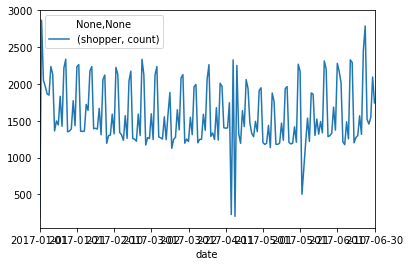

In [8]:
import matplotlib.pyplot as plt

daily_visitors = visitors[['shopper','date']].groupby(['date']).agg(['count'])

daily_visitors_plt = daily_visitors.plot()
plt.show(daily_visitors_plt)

The two downward spikes are for Easter Friday and Easter Sunday when the centre was closed. Another two consecutive downward spike on 22-23 May was a backhaul connection outage.

## Plot shoppers by day of week

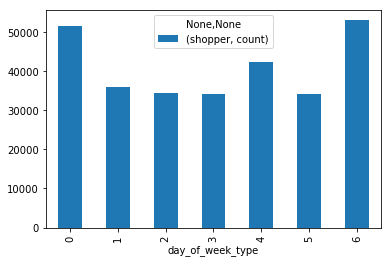

In [9]:
import matplotlib.pyplot as plt

dow_visitors = visitors[['shopper','day_of_week_type']].groupby(['day_of_week_type']).agg(['count'])

dow_visitors_plt = dow_visitors.plot(kind='bar')
plt.show(dow_visitors_plt)

The profile shows the most popular shopping days are Saturday (6) and Sunday (0) followed by Thursday (4) when they centre is open for late night shopping.

## Plot shopper visits historgram

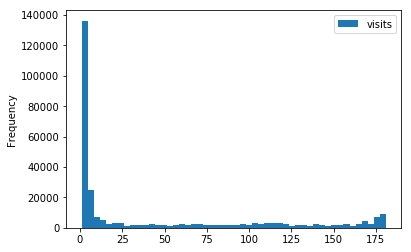

In [10]:
import matplotlib.pyplot as plt

visits = visitors[['visits']]

visits_plt = visits.plot(kind='hist',bins=50)
plt.show(visits_plt)

Most shoppers only made one visit to the centre during the period.

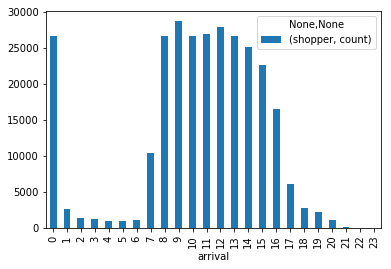

In [11]:
# Plot shopper visits by arrival time (hour)
import matplotlib.pyplot as plt

visitors_arrivals = visitors[['shopper','arrival']].groupby(['arrival']).agg(['count'])

visitors_arrivals_plt = visitors_arrivals.plot(kind='bar')
plt.show(visitors_arrivals_plt)

# Proposed Clustering Techniques

Potential clustering techniques to be tried include:
- Linear SVC (sklearn.svm.LinearSVC)
- K-Means (sklearn.cluster.KMeans)
- DBScan (sklearn.cluster.dbscan)

## K-means

In [12]:
# Load libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
# Aggregate shopper visits by total minute in each zone
visitors_agg = visitors[['shopper']+['date']+zone_columns].groupby(['shopper']).sum()

In [14]:
# Run K-means clustering for 11 clusters
K_count = 11
est = KMeans(n_clusters=K_count, init='random', random_state = 12345)
est.fit(visitors_agg)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=12345, tol=0.0001, verbose=0)

In [15]:
# Calculate the number of members in each cluster
unique, counts = np.unique(est.labels_, return_counts=True)

# Create a new DF with the clusters and number of members
member_count = pd.DataFrame(data=counts,
                            index=unique,
                            columns=["members"])
member_count.index.name = "label"

# Create a new DF with the clusters and their associated centres
clusters = pd.DataFrame(data=est.cluster_centers_,
                        index=unique,
                        columns=zone_columns)

# Join the member count DF to the clusters DF and round the centre numerics to 0 decimal places
member_count.join(clusters).round(0)

,members,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators
label,,,,,,,,,,,
0,27,87.0,-0.0,131.0,0.0,1.0,-0.0,2241.0,123511.0,-0.0,-0.0
1,101,2.0,333.0,2.0,1.0,4593.0,73763.0,592.0,3.0,0.0,0.0
2,85,4.0,11.0,11.0,1.0,7.0,1.0,18.0,24304.0,1.0,0.0
3,78,788.0,1116.0,22819.0,307.0,676.0,135.0,2207.0,660.0,30.0,160.0
4,110974,7.0,7.0,12.0,10.0,9.0,15.0,4.0,17.0,7.0,3.0
5,41,9.0,751.0,66815.0,0.0,727.0,0.0,1079.0,1097.0,-0.0,0.0
6,45,0.0,209.0,3.0,2.0,3820.0,134408.0,794.0,2.0,1.0,0.0
7,112,7.0,441.0,20.0,1182.0,4382.0,31899.0,364.0,12.0,2.0,336.0
8,15,0.0,11.0,2.0,225.0,0.0,3.0,2.0,1.0,38371.0,10148.0


In [16]:
# Calculate number of static devices or staff
member_count.sum() - member_count.iloc[4]['members']

members    560
dtype: int64

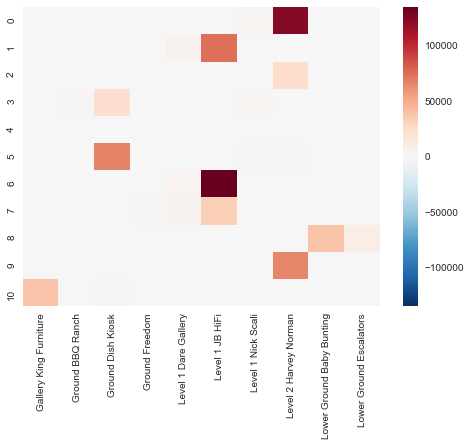

In [17]:
# Plot the centres as a heat map
import seaborn as sns
sns.heatmap(clusters)

#### Running a basic K-means clustering on the data with 11 clusters identifies static devices or staff who are associated with a particular zone or retailer. 

For example
- Cluster 0 appears to be 27 static devices in Harvey Norman
- Clusters 8 represent 15 static devices which can be detected in both Lower Ground Floor zones 
- Cluster 6 represents 45 static devices in JB HiFi

In [18]:
# Add the cluster label to our original shoppers DF
visitors_agg_clustered = visitors_agg
visitors_agg_clustered["cluster"] = est.labels_
visitors_agg_clustered

,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators,cluster
shopper,,,,,,,,,,,
41,0.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
1042,0.0,25.0,20.0,7.0,2.0,33.0,0.0,20.0,2.0,2.0,4
2994,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
5844,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0,0.0,4
6173,8.0,0.0,27.0,34.0,45.0,8.0,1.0,5.0,2.0,0.0,4
7370,0.0,3.0,16.0,19.0,0.0,21.0,6.0,30.0,0.0,2.0,4
7529,0.0,14.0,11.0,10.0,0.0,10.0,2.0,85.0,4.0,4.0,4
7590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
7778,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


## Run Second K-Mean Cluster on Shoppers

In [19]:
# Filter the shoppers for cluster #4
visitors_filtered = visitors_agg_clustered.loc[visitors_agg_clustered["cluster"] == 4][zone_columns]
visitors_filtered.shape

(110974, 10)

In [20]:
# Run K-means clustering for 11 clusters with shoppers filtered
K_count = 11
est2 = KMeans(n_clusters=K_count, init='random', random_state = 12345)
est2.fit(visitors_filtered)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=12345, tol=0.0001, verbose=0)

In [21]:
est2.cluster_centers_

array([[  1.13333333e+01,   3.06846667e+04,   5.99500000e+02,
          8.22166667e+02,   5.16666667e+00,   8.38333333e+01,
          2.16666667e+00,   9.50000000e+00,   7.66666667e+00,
          4.69833333e+02],
       [  1.86666667e+01,   1.33333333e+02,   1.17541667e+02,
          9.66666667e+00,   1.45291667e+04,   2.72308333e+03,
          5.59333333e+02,   2.42500000e+01,   9.95833333e+00,
          3.63333333e+01],
       [  8.73863636e+01,   5.45170455e+03,   1.83590909e+02,
          4.01300000e+03,   1.77318182e+02,   2.78750000e+02,
          1.11272727e+02,   9.62272727e+01,   1.06318182e+02,
          9.03636364e+02],
       [  4.39289706e+03,   2.23529412e+02,   4.44917647e+03,
          1.50000000e+01,   6.01470588e+01,   9.74411765e+01,
          3.12926471e+02,   2.76955882e+02,   2.47941176e+01,
          1.46029412e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.10920000e+05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00

In [22]:
# Calculate the number of members in each cluster
unique, counts = np.unique(est2.labels_, return_counts=True)

# Create a new DF with the clusters and number of members
member_count = pd.DataFrame(data=counts,
                            index=unique,
                            columns=["members"])
member_count.index.name = "label"

# Create a new DF with the clusters and their associated centres
clusters = pd.DataFrame(data=est2.cluster_centers_,
                        index=unique,
                        columns=zone_columns)

# Join the member count DF to the clusters DF and round the centre numerics to 0 decimal places
member_count.join(clusters).round(0)

,members,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators
label,,,,,,,,,,,
0,6,11.0,30685.0,599.0,822.0,5.0,84.0,2.0,10.0,8.0,470.0
1,24,19.0,133.0,118.0,10.0,14529.0,2723.0,559.0,24.0,10.0,36.0
2,44,87.0,5452.0,184.0,4013.0,177.0,279.0,111.0,96.0,106.0,904.0
3,68,4393.0,224.0,4449.0,15.0,60.0,97.0,313.0,277.0,25.0,15.0
4,1,0.0,0.0,0.0,110920.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,3.0,41.0,250.0,0.0,4817.0,141.0,28690.0,824.0,11.0,23.0
6,82,10.0,96.0,250.0,84.0,715.0,8683.0,139.0,20.0,2.0,29.0
7,8,0.0,42.0,8.0,103.0,2.0,12.0,0.0,1.0,13968.0,681.0
8,12,70.0,240.0,149.0,22521.0,127.0,51.0,15.0,9.0,85.0,741.0


In [23]:
# Calculate number of static devices or staff
member_count.sum() - member_count.iloc[10]['members']

members    377
dtype: int64

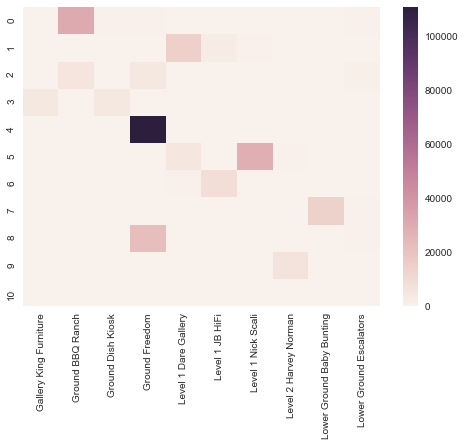

In [24]:
# Plot the centres as a heat map
import seaborn as sns
sns.heatmap(clusters)

In [25]:
visitors_filtered.shape

(110974, 10)

In [26]:
# Add the cluster label to our original shoppers DF
visitors_filtered_2 = visitors_filtered
visitors_filtered_2["cluster"] = est2.labels_
visitors_filtered_2

,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators,cluster
shopper,,,,,,,,,,,
41,0.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10
1042,0.0,25.0,20.0,7.0,2.0,33.0,0.0,20.0,2.0,2.0,10
2994,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
5844,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0,0.0,10
6173,8.0,0.0,27.0,34.0,45.0,8.0,1.0,5.0,2.0,0.0,10
7370,0.0,3.0,16.0,19.0,0.0,21.0,6.0,30.0,0.0,2.0,10
7529,0.0,14.0,11.0,10.0,0.0,10.0,2.0,85.0,4.0,4.0,10
7590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10
7778,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


In [27]:
## Try a 3rd K-Mean on filtered shoppers

In [28]:
# Separate our cluster #10 as real shoppers
visitors_filtered_3 = visitors_filtered_2.loc[visitors_filtered_2["cluster"] == 10][zone_columns]
visitors_filtered_3.shape

(110597, 10)

In [29]:
# Run K-means clustering for 11 clusters with shoppers filtered
K_count = 11
est3 = KMeans(n_clusters=K_count, init='random', random_state = 12345)
est3.fit(visitors_filtered_3)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=12345, tol=0.0001, verbose=0)

In [30]:
est3.cluster_centers_

array([[  6.01190476e+00,   3.14166667e+01,   1.80476190e+01,
          2.26190476e-01,   2.20488095e+02,   2.63648810e+03,
          1.44285714e+01,   2.70238095e+00,   1.52976190e+01,
          1.50476190e+01],
       [  2.50051852e+03,   1.62962963e+01,   1.35037037e+02,
          6.29629630e-01,   9.14814815e+00,   1.74074074e+00,
          3.63703704e+01,   3.40000000e+01,   1.18518519e+00,
          1.40740741e+00],
       [  3.89692308e+02,   1.85384615e+01,   7.51538462e+01,
          4.61538462e-01,   1.98923077e+02,   4.91538462e+01,
          6.44569231e+03,   2.02000000e+02,   2.76923077e+00,
          4.00000000e+00],
       [  3.32739726e+01,   5.91232877e+01,   2.43795890e+03,
          7.00000000e+00,   5.34383562e+01,   5.40821918e+01,
          5.57808219e+01,   6.34794521e+01,   6.16438356e+00,
          8.76712329e+00],
       [  3.32321045e+00,   2.12225115e+00,   6.31436663e+00,
          4.22665022e+00,   3.25789594e+00,   4.79481979e+00,
          1.34264310e+00

In [31]:
# Calculate the number of members in each cluster
unique, counts = np.unique(est3.labels_, return_counts=True)

# Create a new DF with the clusters and number of members
member_count = pd.DataFrame(data=counts,
                            index=unique,
                            columns=["members"])
member_count.index.name = "label"

# Create a new DF with the clusters and their associated centres
clusters = pd.DataFrame(data=est3.cluster_centers_,
                        index=unique,
                        columns=zone_columns)

# Join the member count DF to the clusters DF and round the centre numerics to 0 decimal places
member_count.join(clusters).round(0)

,members,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators
label,,,,,,,,,,,
0,84,6.0,31.0,18.0,0.0,220.0,2636.0,14.0,3.0,15.0,15.0
1,27,2501.0,16.0,135.0,1.0,9.0,2.0,36.0,34.0,1.0,1.0
2,13,390.0,19.0,75.0,0.0,199.0,49.0,6446.0,202.0,3.0,4.0
3,73,33.0,59.0,2438.0,7.0,53.0,54.0,56.0,63.0,6.0,9.0
4,109455,3.0,2.0,6.0,4.0,3.0,5.0,1.0,5.0,6.0,2.0
5,29,1.0,71.0,10.0,6.0,8.0,12.0,0.0,3.0,3226.0,200.0
6,718,25.0,17.0,151.0,13.0,127.0,155.0,49.0,202.0,13.0,6.0
7,32,7.0,151.0,22.0,2142.0,23.0,19.0,0.0,2.0,23.0,105.0
8,26,15.0,2157.0,115.0,183.0,58.0,58.0,69.0,55.0,3.0,97.0


In [32]:
# Calculate number of static devices or staff
member_count.sum() - member_count.iloc[4]['members']

members    1142
dtype: int64

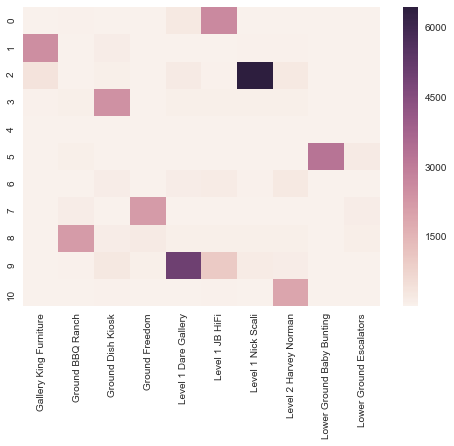

In [33]:
# Plot the centres as a heat map
import seaborn as sns
sns.heatmap(clusters)

# Remove staff and static devices based on number of visits
Going to be very slow to converge so need to do this manually before the K-mean clustering

In [34]:
# Calculate total visit during based on summing dwells
visitors_total = visitors
visitors_total['duration'] = visitors_total[zone_columns].sum(axis=1) 

# Calculate the number of visited zones during visit 
visitors_total['zone_count'] = (visitors_total[zone_columns] > 0).astype(int).sum(axis=1)

# Check if any zone dwells are more than 120 mins
visitors_total['long_dwell'] = (visitors_total[zone_columns]>120).any(axis=1)


# Assume shoppers will have the following characteristics
# - Less than 20 visits
# - Less than 120 minutes in any one zone
# - Between than 30 minutes and 240 minutes total duration
# - More than 1 active zone 
shoppers = visitors.query('visits <= 20 & duration > 30 & duration < 240 and zone_count > 1 and not(long_dwell)')
shoppers.shape

(38782, 19)

In [35]:
## Run K-Mean on shoppers

In [36]:
# Run K-means clustering for 11 clusters
K_count = 10
est = KMeans(n_clusters=K_count, init='random', random_state = 12345)
est.fit(shoppers[zone_columns])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=12345, tol=0.0001, verbose=0)

In [37]:
# Calculate the number of members in each cluster
unique, counts = np.unique(est.labels_, return_counts=True)

# Create a new DF with the clusters and number of members
member_count = pd.DataFrame(data=counts,
                            index=unique,
                            columns=["members"])
member_count.index.name = "label"

# Create a new DF with the clusters and their associated centres
clusters = pd.DataFrame(data=est.cluster_centers_,
                        index=unique,
                        columns=zone_columns)

# Join the member count DF to the clusters DF and round the centre numerics to 0 decimal places
member_count.join(clusters).round(0)

,members,Gallery King Furniture,Ground BBQ Ranch,Ground Dish Kiosk,Ground Freedom,Level 1 Dare Gallery,Level 1 JB HiFi,Level 1 Nick Scali,Level 2 Harvey Norman,Lower Ground Baby Bunting,Lower Ground Escalators
label,,,,,,,,,,,
0,3876,2.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,40.0,3.0
1,758,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,8.0,44.0
2,3887,4.0,3.0,41.0,5.0,2.0,3.0,2.0,3.0,2.0,1.0
3,3888,3.0,4.0,7.0,39.0,3.0,3.0,2.0,3.0,1.0,1.0
4,1291,3.0,2.0,6.0,3.0,4.0,5.0,2.0,67.0,1.0,1.0
5,3430,3.0,1.0,4.0,3.0,40.0,6.0,2.0,3.0,2.0,1.0
6,2638,42.0,2.0,7.0,4.0,3.0,3.0,3.0,3.0,2.0,1.0
7,9640,4.0,6.0,8.0,6.0,4.0,5.0,5.0,3.0,3.0,1.0
8,3993,1.0,1.0,4.0,2.0,5.0,39.0,1.0,4.0,1.0,1.0


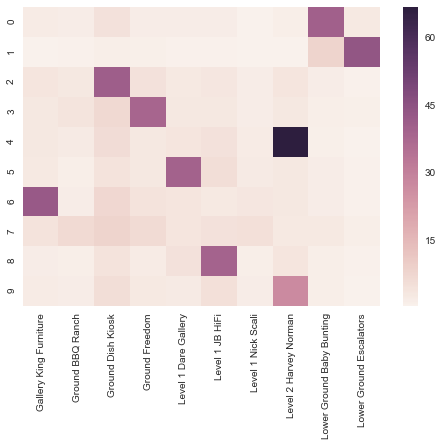

In [38]:
# Plot the centres as a heat map
import seaborn as sns
sns.heatmap(clusters)

Using 10 clusters results in clusters focused on dwelling in each individual zone except for BBQ ranch

In [39]:
# Create a bunch of different models
k_rng = range(1,5)
d= shoppers[zone_columns]
est = [KMeans(n_clusters = k).fit(d) for k in k_rng]

#================================
# Option 1: Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k

from sklearn import metrics
silhouette_scores = [metrics.silhouette_score(d, e.labels_, metric='euclidean') for e in est[1:]]

silhouette_scores

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


MemoryError: 

Need to use a bigger computer!